$\text{Quantum Teleportation}$

In [187]:
#Importing

import qiskit
import numpy as np
import math
from qiskit import QuantumCircuit,QuantumRegister,transpile, ClassicalRegister
from qiskit.quantum_info import DensityMatrix, Operator
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector, plot_state_city, plot_state_qsphere, array_to_latex
from qiskit.quantum_info import Statevector, random_statevector
from  math import pi, sqrt
from qiskit.circuit.library import Initialize

mpl = 'mpl'

$\text{Create Initial State}$

In [188]:
psi = random_statevector(2)

print('psi state: ()', format(psi))

array_to_latex(psi)



psi state: () Statevector([-0.55404618-0.24143445j,  0.77196016-0.19702725j],
            dims=(2,))


<IPython.core.display.Latex object>

$\text{Visualize } q_0 \text{ state with bloch sphere}$

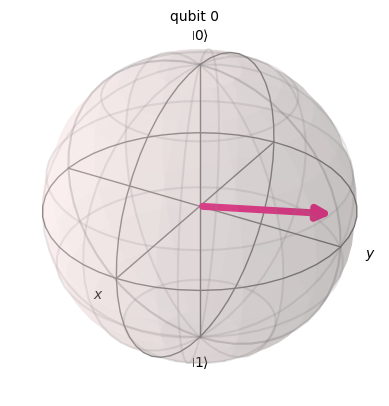

In [189]:
plot_bloch_multivector(psi)

In [190]:
init_state = Initialize(psi)
init_state.label = 'initial state'

#create an entangle pair

def create_bell_state(qc, a, b):
    qc.h(a)
    qc.cx(a,b)

# Alice's gate

def alice_gates(qc, psi, a):
    qc.cx(psi,a)
    qc.h(psi)

# Measuring Alice's state and send to Bob.

def measure_and_send(qc, a, b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)


# Rotation Bob's qubit

def bob_gates(qc, qubit, crx , crz):
    qc.x(qubit).c_if(crx, 1)
    qc.z(qubit).c_if(crz, 1)



$\text{Constructing the Circuit}$

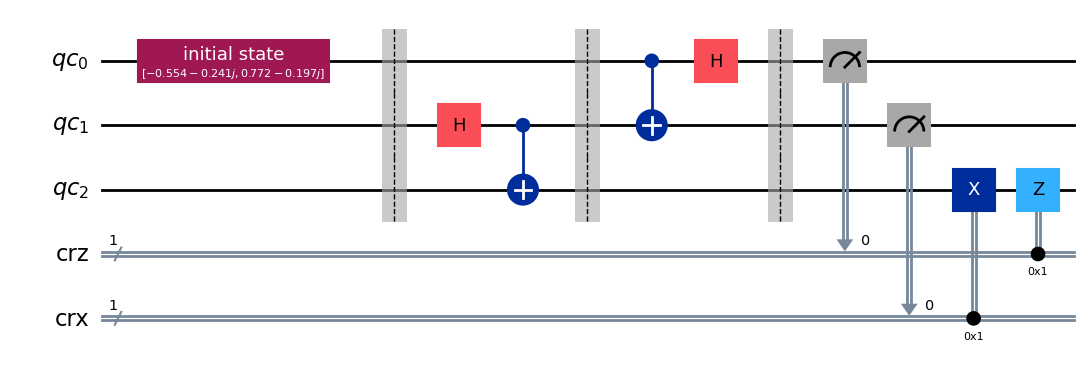

In [191]:
qr = QuantumRegister(3, name='qc')
crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')

qc = QuantumCircuit(qr, crz, crx)

qc.append(init_state, [0])
qc.barrier()

create_bell_state(qc, 1, 2)
qc.barrier()

alice_gates(qc, 0, 1)

measure_and_send(qc, 0, 1)

bob_gates(qc, 2, crx, crz)

qc.draw(mpl)


The quantum State is:  Statevector([-0.554-0.241j,  0.   +0.j   ,  0.   +0.j   , -0.   +0.j   ,
              0.772-0.197j, -0.   +0.j   ,  0.   -0.j   ,  0.   +0.j   ],
            dims=(2, 2, 2))


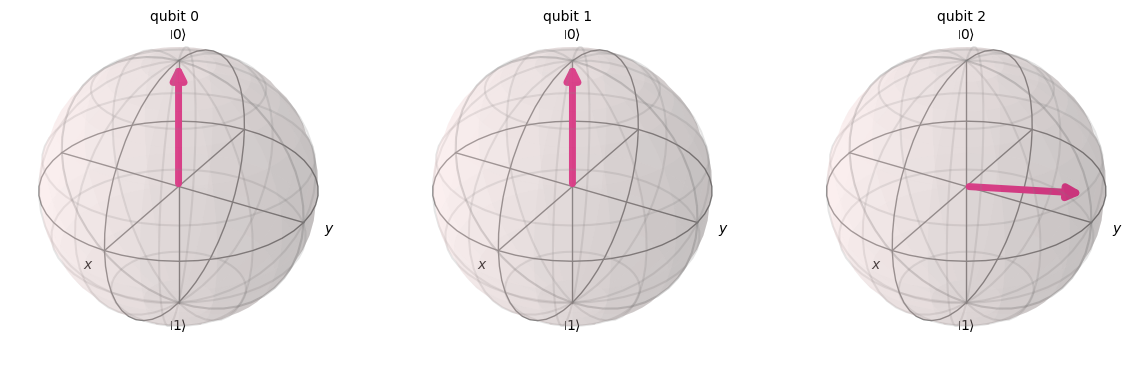

In [192]:
backend = Aer.get_backend('statevector_simulator')

circ = transpile(qc, backend)

result = backend.run(circ).result().get_statevector(circ, decimals=3)

print("The quantum State is: ",result)

plot_bloch_multivector(result)